In [4]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

last updated: 2019-10-29 

CPython 3.7.3
IPython 7.6.1

numpy 1.17.2
tensorflow 1.13.1
matplotlib 3.1.0


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [6]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()

print('랭크:', r1, r2, r3)
print()
print('크기:', s1, s2, s3)

랭크: Tensor("Rank_6:0", shape=(), dtype=int32) Tensor("Rank_7:0", shape=(), dtype=int32) Tensor("Rank_8:0", shape=(), dtype=int32)

크기: () (4,) (2, 2)


In [7]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

Tensor("Const_9:0", shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float64_ref>


In [8]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z)

2*(a-b)+c =>  Tensor("add:0", shape=(), dtype=int32)


In [11]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))
    
#with tf.compat.v1.Session(graph=g) as sess:    # 텐서플로우 2.0 이상일때 사용
#    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [12]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>]

In [13]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

신경망 모델 구성

In [15]:
# 학습에 직접적으로 사용하지 않고 학습 횟수에 따라 단순히 증가시킬 변수를 만듭니다.
global_step = tf.Variable(0, trainable=False, name='global_step')

In [16]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_uniform([10, 20], -1., 1.))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_uniform([20, 3], -1., 1.))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
# global_step로 넘겨준 변수를, 학습용 변수들을 최적화 할 때 마다 학습 횟수를 하나씩 증가시킵니다.
train_op = optimizer.minimize(cost, global_step=global_step)

In [ ]:
# 신경망 모델 학습

In [53]:
sess = tf.Session()
# 모델을 저장하고 불러오는 API를 초기화합니다.
# global_variables 함수를 통해 앞서 정의하였던 변수들을 저장하거나 불러올 변수들로 설정합니다.
saver = tf.train.Saver(tf.global_variables())

In [58]:
ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())

INFO:tensorflow:Restoring parameters from ./model\dnn.ckpt-2


In [59]:
#데이터 로드해보기
df = pd.read_csv('C:/Users/deseo/AI ex Folder/introduction_to_ml_with_python-master/data/data.csv', header=None)

x_data = df.iloc[:, 0:2].values
y_data = df.iloc[:, 2:6].values

print (x_data)
print (y_data)

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]]
[[1 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [65]:
# 최적화 진행
for step in range(2):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    print('Step: %d, ' % sess.run(global_step),
          'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))

Step: 9,  Cost: 0.998
Step: 10,  Cost: 0.972


In [66]:
# 최적화가 끝난 뒤, 변수를 저장합니다.
saver.save(sess, './model/dnn.ckpt', global_step=global_step)

'./model/dnn.ckpt-10'

In [67]:
#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 100.00


텐서보드

In [73]:
# 버전 텐서플로 2.0부터는 자체 내장,  이전 버전에서는 잘 안돌아감

In [76]:
# 텐서보드를 이용하기 위해 각종 변수들을 설정하고 저장하는 방법을 익혀봅니다.

import tensorflow as tf
import numpy as np

#########
# 신경망 모델 구성
######
global_step = tf.Variable(0, trainable=False, name='global_step')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [77]:
# with tf.name_scope 으로 묶은 블럭은 텐서보드에서 한 레이어안에 표현해줍니다
with tf.name_scope('layer1'):
    W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.), name='W1')
    L1 = tf.nn.relu(tf.matmul(X, W1))

with tf.name_scope('layer2'):
    W2 = tf.Variable(tf.random_uniform([10, 20], -1., 1.), name='W2')
    L2 = tf.nn.relu(tf.matmul(L1, W2))

with tf.name_scope('output'):
    W3 = tf.Variable(tf.random_uniform([20, 3], -1., 1.), name='W3')
    model = tf.matmul(L2, W3)

with tf.name_scope('optimizer'):
    cost = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))

    optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
    train_op = optimizer.minimize(cost, global_step=global_step)

    # tf.summary.scalar 를 이용해 수집하고 싶은 값들을 지정할 수 있습니다.
    tf.summary.scalar('cost', cost)

In [78]:
#########
# 신경망 모델 학습
######
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())

ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())

# 텐서보드에서 표시해주기 위한 텐서들을 수집합니다.
merged = tf.summary.merge_all()
# 저장할 그래프와 텐서값들을 저장할 디렉토리를 설정합니다.
writer = tf.summary.FileWriter('./logs', sess.graph)
# 이렇게 저장한 로그는, 학습 후 다음의 명령어를 이용해 웹서버를 실행시킨 뒤
# tensorboard --logdir=./logs
# = tensorboard --logdir=introduction_to_ml_with_python-master/logs
# 다음 주소와 웹브라우저를 이용해 텐서보드에서 확인할 수 있습니다.
# http://localhost:6006

In [82]:
# 최적화 진행
for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    print('Step: %d, ' % sess.run(global_step),
          'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    # 적절한 시점에 저장할 값들을 수집하고 저장합니다.
    #summary = sess.run(merged, feed_dict={X: x_data, Y: y_data})     #버전이 낮아서 위아래 두개 주석걸고 돌리니 됨
    #writer.add_summary(summary, global_step=sess.run(global_step))   #버전이 낮아서 위아래 두개 주석걸고 돌리니 됨

saver.save(sess, './model/dnn.ckpt', global_step=global_step)


Step: 3,  Cost: 1.157
Step: 4,  Cost: 1.104
Step: 5,  Cost: 1.055
Step: 6,  Cost: 1.010
Step: 7,  Cost: 0.968
Step: 8,  Cost: 0.931
Step: 9,  Cost: 0.900
Step: 10,  Cost: 0.876
Step: 11,  Cost: 0.856
Step: 12,  Cost: 0.840
Step: 13,  Cost: 0.826
Step: 14,  Cost: 0.814
Step: 15,  Cost: 0.804
Step: 16,  Cost: 0.794
Step: 17,  Cost: 0.786
Step: 18,  Cost: 0.779
Step: 19,  Cost: 0.773
Step: 20,  Cost: 0.768
Step: 21,  Cost: 0.763
Step: 22,  Cost: 0.759
Step: 23,  Cost: 0.755
Step: 24,  Cost: 0.752
Step: 25,  Cost: 0.750
Step: 26,  Cost: 0.748
Step: 27,  Cost: 0.746
Step: 28,  Cost: 0.744
Step: 29,  Cost: 0.743
Step: 30,  Cost: 0.742
Step: 31,  Cost: 0.741
Step: 32,  Cost: 0.740
Step: 33,  Cost: 0.739
Step: 34,  Cost: 0.739
Step: 35,  Cost: 0.738
Step: 36,  Cost: 0.738
Step: 37,  Cost: 0.737
Step: 38,  Cost: 0.737
Step: 39,  Cost: 0.737
Step: 40,  Cost: 0.736
Step: 41,  Cost: 0.736
Step: 42,  Cost: 0.736
Step: 43,  Cost: 0.736
Step: 44,  Cost: 0.735
Step: 45,  Cost: 0.735
Step: 46,  Cost: 0

'./model/dnn.ckpt-102'

In [83]:
#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))


예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 100.00


In [ ]:
# %load_ext tensorboard.notebook

In [ ]:
# %tensorboard --logdir logs --port 6006

In [ ]:
# tensorboard --logdir=./logs
# 다음 주소와 웹브라우저를 이용해 텐서보드에서 확인할 수 있습니다.
# http://localhost:6006

MNIST

In [85]:
from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [86]:
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 10])

In [87]:
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

In [88]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

신경망 모델 학습

In [89]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.399
Epoch: 0002 Avg. cost = 0.141
Epoch: 0003 Avg. cost = 0.093
Epoch: 0004 Avg. cost = 0.068
Epoch: 0005 Avg. cost = 0.052
Epoch: 0006 Avg. cost = 0.038
Epoch: 0007 Avg. cost = 0.030
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.021
Epoch: 0010 Avg. cost = 0.015
Epoch: 0011 Avg. cost = 0.016
Epoch: 0012 Avg. cost = 0.013
Epoch: 0013 Avg. cost = 0.012
Epoch: 0014 Avg. cost = 0.011
Epoch: 0015 Avg. cost = 0.011
최적화 완료!


In [90]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))


정확도: 0.9776


In [91]:
#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [92]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

In [93]:
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [94]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [95]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [96]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [97]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')


Epoch: 0001 Avg. cost = 0.426
Epoch: 0002 Avg. cost = 0.161
Epoch: 0003 Avg. cost = 0.110
Epoch: 0004 Avg. cost = 0.086
Epoch: 0005 Avg. cost = 0.073
Epoch: 0006 Avg. cost = 0.059
Epoch: 0007 Avg. cost = 0.053
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.042
Epoch: 0010 Avg. cost = 0.037
Epoch: 0011 Avg. cost = 0.032
Epoch: 0012 Avg. cost = 0.028
Epoch: 0013 Avg. cost = 0.030
Epoch: 0014 Avg. cost = 0.027
Epoch: 0015 Avg. cost = 0.025
Epoch: 0016 Avg. cost = 0.024
Epoch: 0017 Avg. cost = 0.022
Epoch: 0018 Avg. cost = 0.022
Epoch: 0019 Avg. cost = 0.020
Epoch: 0020 Avg. cost = 0.019
Epoch: 0021 Avg. cost = 0.020
Epoch: 0022 Avg. cost = 0.020
Epoch: 0023 Avg. cost = 0.016
Epoch: 0024 Avg. cost = 0.018
Epoch: 0025 Avg. cost = 0.017
Epoch: 0026 Avg. cost = 0.017
Epoch: 0027 Avg. cost = 0.017
Epoch: 0028 Avg. cost = 0.018
Epoch: 0029 Avg. cost = 0.017
Epoch: 0030 Avg. cost = 0.014
최적화 완료!


In [98]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

정확도: 0.9809


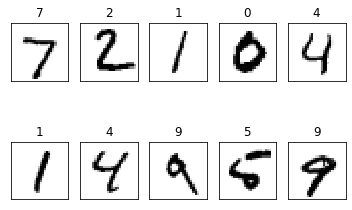

In [99]:
import matplotlib.pyplot as plt
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

In [100]:
# 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용하여 더 높은 인식률을 만들어봅니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


CNN

In [ ]:
#########
# 신경망 모델 구성
######

In [101]:
# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [102]:
# 각각의 변수와 레이어는 다음과 같은 형태로 구성됩니다.
# W1 [3 3 1 32] -> [3 3]: 커널 크기, 1: 입력값 X 의 특성수, 32: 필터 갯수
# L1 Conv shape=(?, 28, 28, 32)
#    Pool     ->(?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# tf.nn.conv2d 를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있습니다.
# padding='SAME' 은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# Pooling 역시 tf.nn.max_pool 을 이용하여 쉽게 구성할 수 있습니다.
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [103]:
# L2 Conv shape=(?, 14, 14, 64)
#    Pool     ->(?, 7, 7, 64)
# W2 의 [3, 3, 32, 64] 에서 32 는 L1 에서 출력된 W1 의 마지막 차원, 필터의 크기 입니다.
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob)

In [104]:
# FC 레이어: 입력값 7x7x64 -> 출력값 256
# Full connect를 위해 직전의 Pool 사이즈인 (?, 7, 7, 64) 를 참고하여 차원을 줄여줍니다.
#    Reshape  ->(?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

In [105]:
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

In [110]:
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
#optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)     #주석건 위 대신에 이걸로 하니까 정확도 약간 더 오름

In [111]:
#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)


In [112]:
for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.920
Epoch: 0002 Avg. cost = 0.103
Epoch: 0003 Avg. cost = 0.066
Epoch: 0004 Avg. cost = 0.048
Epoch: 0005 Avg. cost = 0.041
Epoch: 0006 Avg. cost = 0.035
Epoch: 0007 Avg. cost = 0.029
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.023
Epoch: 0010 Avg. cost = 0.021
Epoch: 0011 Avg. cost = 0.018
Epoch: 0012 Avg. cost = 0.016
Epoch: 0013 Avg. cost = 0.016
Epoch: 0014 Avg. cost = 0.015
Epoch: 0015 Avg. cost = 0.012
최적화 완료!


In [113]:
#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

정확도: 0.9916
